In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import distributions as dist
import pymc3 as pm
from prettytable import PrettyTable

In [2]:
def f(x):
    return np.cos(2*np.pi * x)

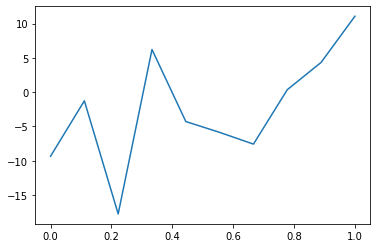

In [3]:
x = np.linspace(0,1, 10)
e = dist.norm(0,12).rvs(len(x))
y = f(x) + e
plt.plot(x, y)

In [4]:
p1 = np.poly1d(np.polyfit(x, y, deg = 1))
p2 = np.poly1d(np.polyfit(x, y, deg = 2))
p3 = np.poly1d(np.polyfit(x, y, deg = 3))
p4 = np.poly1d(np.polyfit(x, y, deg = 4))
p5 = np.poly1d(np.polyfit(x, y, deg = 5))
p6 = np.poly1d(np.polyfit(x, y, deg = 6))
p7 = np.poly1d(np.polyfit(x, y, deg = 7))
p8 = np.poly1d(np.polyfit(x, y, deg = 8))
p9 = np.poly1d(np.polyfit(x, y, deg = 9))


Text(0.5, 1.0, 'P_9')

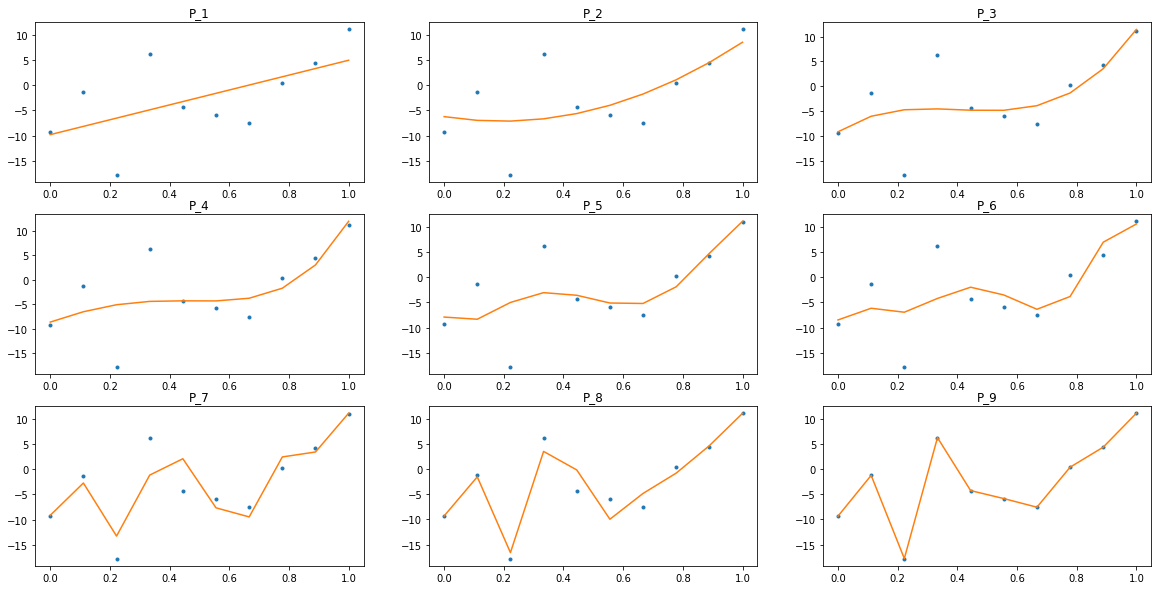

In [5]:
x1 = np.linspace(0, 1, 10) 
_, axi = plt.subplots(3,3, figsize = (20, 10))
axi[0][0].plot(x, y, '.', x1, p1(x1))
axi[0][0].set_title('P_1')
axi[0][1].plot(x, y, '.', x1, p2(x1))
axi[0][1].set_title('P_2')
axi[0][2].plot(x, y, '.', x1, p3(x1))
axi[0][2].set_title('P_3')
axi[1][0].plot(x, y, '.', x1, p4(x1))
axi[1][0].set_title('P_4')
axi[1][1].plot(x, y, '.', x1, p5(x1))
axi[1][1].set_title('P_5')
axi[1][2].plot(x, y, '.', x1, p6(x1))
axi[1][2].set_title('P_6')
axi[2][0].plot(x, y, '.', x1, p7(x1))
axi[2][0].set_title('P_7')
axi[2][1].plot(x, y, '.', x1, p8(x1))
axi[2][1].set_title('P_8')
axi[2][2].plot(x, y, '.', x1, p9(x1))
axi[2][2].set_title('P_9')

In [12]:
table = PrettyTable(['W_1', 'W_2', 'W_3', 'W_4', 'W_5', 'W_6', 'W_7', 'W_8', 'W_9' ])
for x in range (0,10):
    table.add_row([p1[x],p2[x],p3[x],p4[x],p5[x],p6[x],p7[x],p8[x],p9[x]])
    
print(table)

+--------------------+--------------------+---------------------+---------------------+--------------------+---------------------+---------------------+---------------------+---------------------+
|        W_1         |        W_2         |         W_3         |         W_4         |        W_5         |         W_6         |         W_7         |         W_8         |         W_9         |
+--------------------+--------------------+---------------------+---------------------+--------------------+---------------------+---------------------+---------------------+---------------------+
| -9.789586582842944 | -6.220636934121629 |  -9.11722931730959  |  -8.66128814022473  | -7.899985769108341 |  -8.488699569461165 |  -9.150708325959593 |  -9.315642726689571 |  -9.348165108801254 |
|  14.7508229067476  | -9.339587222121281 |  38.350737372508895 |  21.252943231826126 | -48.10170277685686 |  108.99657484690503 |  824.9070300156525  |  2005.2883472485726 |  5400.451747628571  |
|         0    

In [22]:
with pm.Model() as model_poly:
    #priors
    W_0 = pm.Normal('Intercepts', mu = 0, sigma = 10, shape = 1)
    W = pm.Normal('Weights', mu = 0, sigma = 10, shape = 4)
    sigma = pm.HalfCauchy('sigma', 10)
    
    #mean
    mu = pm.Deterministic('mu', W_0 + W[1]*np.cos(x) + W[2]* np.cos(x)**2 + W[3]*np.cos(x)**3)
    
    #likelihood
    y = pm.Normal('y', mu = mu, sigma = sigma, observed = y)
    trace = pm.sample(2000, tune = 1000)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Weights, Intercepts]
Sampling 4 chains, 3 divergences: 100%|███████████████████████████████████████| 12000/12000 [06:25<00:00, 31.14draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
